In [1]:
'''
As a range-bound oscillator, The Choppiness Index has values that always fall within a certain range
CHOP produces values that operate between 0 and 100.
The closer the value is to 100, the higher the choppiness (sideways movement) levels.
The closer the value is to 0, the stronger the market is trending (directional movement)
61.8 for the high threshold and 38.2 for the lower threshold
'''

'\nAs a range-bound oscillator, The Choppiness Index has values that always fall within a certain range\nCHOP produces values that operate between 0 and 100.\nThe closer the value is to 100, the higher the choppiness (sideways movement) levels.\nThe closer the value is to 0, the stronger the market is trending (directional movement)\n61.8 for the high threshold and 38.2 for the lower threshold\n'

In [8]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

#download data into DataFrame and create moving averages columns
df = data.DataReader('AAPL', 'yahoo', start='1/1/2014', end='1/1/2016')

In [10]:
ATR_period = 14
CHOP_period = 14
df['CHOP ' + str(CHOP_period)] = np.nan
df['TR'] = np.nan
df['ATR'] = np.nan

for i in range(len(df['Close'])):
    df['TR'][i] = np.max([ df['High'][i] - df['Low'][i], 
                               abs(df['High'][i] - df['Close'][i-1]), 
                               abs(df['Low'][i] - df['Close'][i-1]) ])
df['TR'][0] = np.nan
df['ATR'] = df['TR'].rolling(window=ATR_period).mean()
df.head(30)

,High,Low,Open,Close,Volume,Adj Close,CHOP 14,TR,ATR
Date,,,,,,,,,
2013-12-31,80.182854,79.142860,79.167145,80.145714,55771100.0,71.756508,NaN,NaN,NaN
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,70.747330,NaN,1.285713,NaN
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.193306,NaN,1.895714,NaN
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.570625,NaN,1.885719,NaN
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.073074,NaN,1.148575,NaN
2014-01-08,77.937141,76.955711,76.972855,77.637146,64632400.0,69.510536,NaN,0.981430,NaN
2014-01-09,78.122856,76.478569,78.114288,76.645714,69787200.0,68.622864,NaN,1.644287,NaN
2014-01-10,77.257141,75.872856,77.118568,76.134285,76244000.0,68.164963,NaN,1.384285,NaN
2014-01-13,77.500000,75.697144,75.701431,76.532860,94623200.0,68.521805,NaN,1.802856,NaN


In [8]:
df['CHOP ' + str(CHOP_period)] = 100 * ( np.log10( df['ATR'].rolling(window=CHOP_period).sum() / ( df['High'].rolling(window=CHOP_period).max() - df['Low'].rolling(window=CHOP_period).min() ) ) )/ np.log10(CHOP_period)

<IPython.core.display.Javascript object>


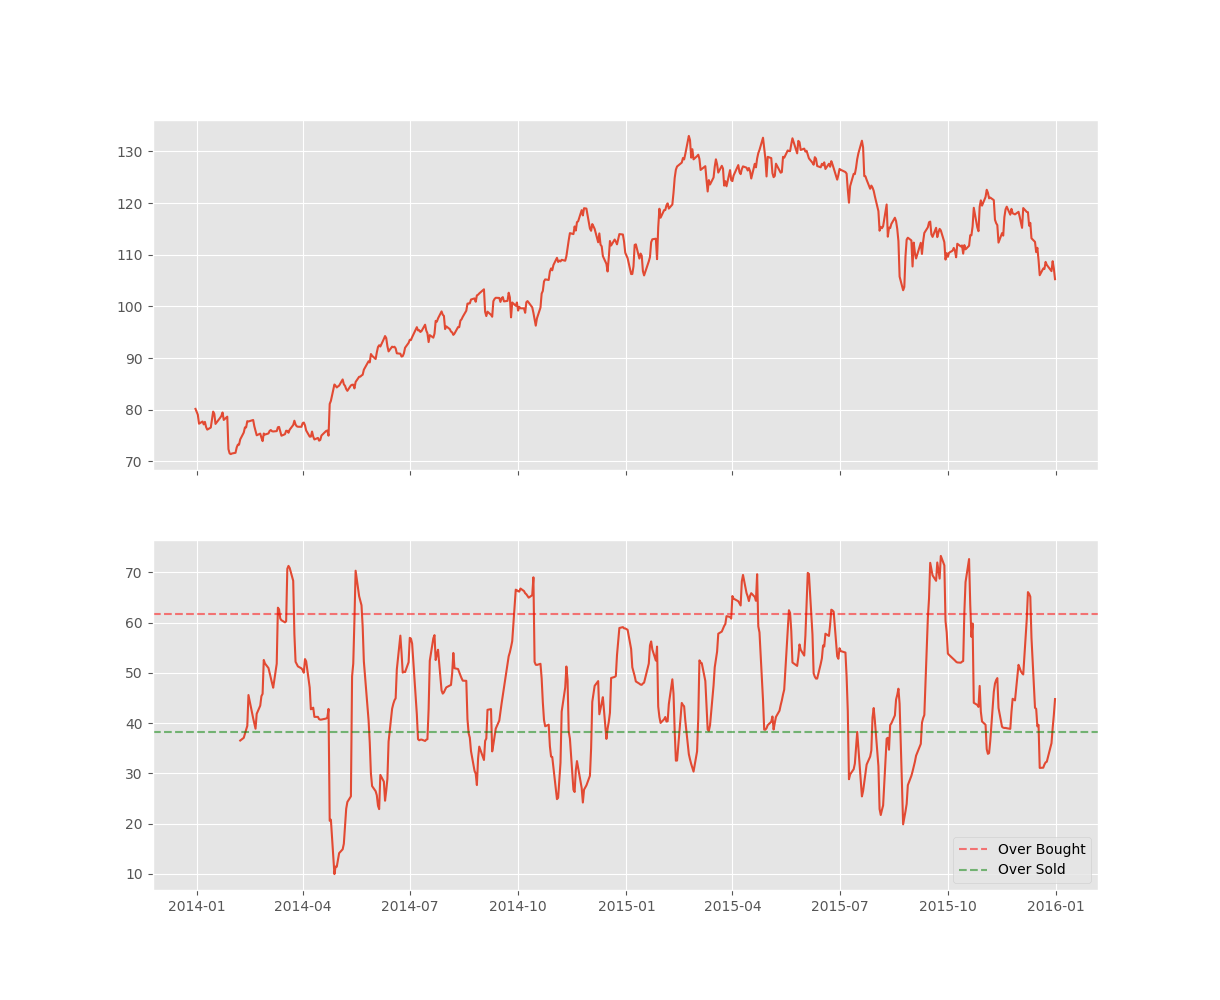

In [9]:
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12.2,10))
ax1.plot(df.index, df['Close'])
ax2.plot(df.index, df['CHOP ' + str(CHOP_period)])
ax2.axhline(61.8, linestyle='--', alpha = 0.5, color = 'red', label='Over Bought')
ax2.axhline(38.2, linestyle='--', alpha = 0.5, color = 'green', label='Over Sold')
plt.legend(loc='lower right')
plt.show()